### Importing Libraries

In [528]:
import os
os.getcwd()

'C:\\BigData\\~notebookJupyter'

In [529]:
import requests
requests.packages.urllib3.disable_warnings()


In [530]:
import plotly.plotly as py
import plotly.graph_objs as go

In [531]:
import findspark
import pandas as pd
findspark.init("C:\BigData\Spark")
findspark.find()

'C:\\BigData\\Spark'

In [532]:
import pyspark
from pyspark import SparkContext
from pyspark import SQLContext
from pyspark.sql import SparkSession 
from pyspark.sql.functions import *

In [533]:
spark.conf.set("spark.sql.excution.arrow.enabled","true")

In [534]:
import seaborn as sns
import matplotlib.pyplot as plt

In [535]:
sc = SparkContext.getOrCreate()
spark=SparkSession.builder.getOrCreate()
print(sc.version)

2.4.7


In [536]:
from pyspark.sql.types import IntegerType

In [537]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

### Loading Dataset

In [538]:
%%time
orig_df = pd.read_csv("C:/Users/HP/Desktop/ECE552_final/ECE552_project/BitcoinHeistData.csv")

Wall time: 3.06 s


In [607]:
orig_df.head()
orig_df.reset_index(drop=True, inplace=True)

### converting into bitcoin

In [540]:

orig_df['income'] = orig_df['income']/100000000

In [541]:
orig_df=orig_df.dropna()

In [542]:
orig_df.to_csv("C:/Users/HP/Desktop/ECE552_final/ECE552_project/BitcoinHeistData1.csv")

### reading data using spark

In [543]:
%%time
df = spark.read.format("csv"). \
            option("header", "true").option("mode", "DROPMALFORMED").option("delimiter", ","). \
            option("ignoreLeadingWhiteSpace","true").option("ignoreTrailingWhiteSpace","true"). \
            option("inferschema","true"). \
            load('C:/Users/HP/Desktop/ECE552_final/ECE552_project/BitcoinHeistData1.csv')

Wall time: 3.98 s


In [544]:
print(df.count())
df.printSchema()

1048575
root
 |-- _c0: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- length: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- count: integer (nullable = true)
 |-- looped: integer (nullable = true)
 |-- neighbors: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- label: string (nullable = true)



### Writing paruet

In [545]:
df.repartition(4).write.mode('overwrite').parquet('C:/Users/HP/Desktop/ECE552_final/ECE552_project/BitcoinHeistData.csv' + '.parquet')

In [546]:
%%time
spark=SparkSession.builder.appName("Python Spark dataframe").config("spark.some.config.option", "some-value").getOrCreate()
parquet_df=spark.read.parquet("C:/Users/HP/Desktop/ECE552_final/ECE552_project/BitcoinHeistData.csv.parquet")

Wall time: 146 ms


In [547]:
type(parquet_df)

pyspark.sql.dataframe.DataFrame

In [548]:
parquet_df.show()

+------+--------------------+----+---+------+-----------+-----+------+---------+------------+---------------+
|   _c0|             address|year|day|length|     weight|count|looped|neighbors|      income|          label|
+------+--------------------+----+---+------+-----------+-----+------+---------+------------+---------------+
|207249|1EkNTexkRsMpgTE7a...|2011|176|   124|    2.98E-8|    2|     0|        2|        2.25|          white|
|121548|13JrBxWSJEjXtvAwa...|2011| 90|     6|       0.75|    3|     0|        2|        80.0|          white|
| 97738|18CRxe48uz1a3LWgd...|2011| 67|     0|        0.5|    1|     0|        2|      116.91|          white|
| 75564|17hFuRueNZAiPwDr1...|2011| 44|    16|    0.03125|    1|     0|        1|         0.3|          white|
| 72434|14XRZVVCi6j7aH6U9...|2011| 41|    22| 2.44141E-4|    1|     0|        2|         0.5|          white|
|210188|1JucwoRuVqAh4g7Lu...|2011|179|     0|        0.5|    1|     0|        1|     2.93118|          white|
| 84220|1Q

In [549]:
print(parquet_df.count())
parquet_df.printSchema()

1048575
root
 |-- _c0: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- length: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- count: integer (nullable = true)
 |-- looped: integer (nullable = true)
 |-- neighbors: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- label: string (nullable = true)



In [550]:
#import org.apache.spark.sql.types.IntegerType
#bitcoin_df["income"].astype("int64")

In [551]:
print(parquet_df.schema["income"].dataType)

DoubleType


In [552]:
parquet_df.select([count(when(col(c).isNull(), c)).alias(c) for c in parquet_df.columns]).show()

+---+-------+----+---+------+------+-----+------+---------+------+-----+
|_c0|address|year|day|length|weight|count|looped|neighbors|income|label|
+---+-------+----+---+------+------+-----+------+---------+------+-----+
|  0|      0|   0|  0|     0|     0|    0|     0|        0|     0|    0|
+---+-------+----+---+------+------+-----+------+---------+------+-----+



In [553]:
parquet_df = parquet_df.na.drop()

In [554]:
parquet_df.show()

+------+--------------------+----+---+------+-----------+-----+------+---------+------------+---------------+
|   _c0|             address|year|day|length|     weight|count|looped|neighbors|      income|          label|
+------+--------------------+----+---+------+-----------+-----+------+---------+------------+---------------+
|207249|1EkNTexkRsMpgTE7a...|2011|176|   124|    2.98E-8|    2|     0|        2|        2.25|          white|
|121548|13JrBxWSJEjXtvAwa...|2011| 90|     6|       0.75|    3|     0|        2|        80.0|          white|
| 97738|18CRxe48uz1a3LWgd...|2011| 67|     0|        0.5|    1|     0|        2|      116.91|          white|
| 75564|17hFuRueNZAiPwDr1...|2011| 44|    16|    0.03125|    1|     0|        1|         0.3|          white|
| 72434|14XRZVVCi6j7aH6U9...|2011| 41|    22| 2.44141E-4|    1|     0|        2|         0.5|          white|
|210188|1JucwoRuVqAh4g7Lu...|2011|179|     0|        0.5|    1|     0|        1|     2.93118|          white|
| 84220|1Q

In [555]:
from pyspark.sql.functions import desc

In [556]:
parquet_df.createOrReplaceTempView("bc_data")

In [557]:
income_year = spark.sql("SELECT income,year from bc_data order by income desc")

### Highest transaction from the data set and the year it occured

In [558]:
income_year.head(3) ##499643 will be highest

[Row(income=499643.98238996, year=2011),
 Row(income=498244.66601007, year=2011),
 Row(income=497976.31116927, year=2011)]

### The Year wise transation count

In [559]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [560]:
Year_txn=spark.sql("select year,count(year) as number_of_txn_per_year from bc_data where year<=2014 group by year order by 2 desc")

In [561]:
Year_txn.show()

+----+----------------------+
|year|number_of_txn_per_year|
+----+----------------------+
|2012|                365714|
|2011|                355349|
|2013|                294372|
|2014|                 10319|
+----+----------------------+



In [562]:
type(Year_txn)

pyspark.sql.dataframe.DataFrame

In [563]:
Year_txn=Year_txn.toPandas()

In [564]:
temp1=Year_txn["year"]
temp=Year_txn["number_of_txn_per_year"]

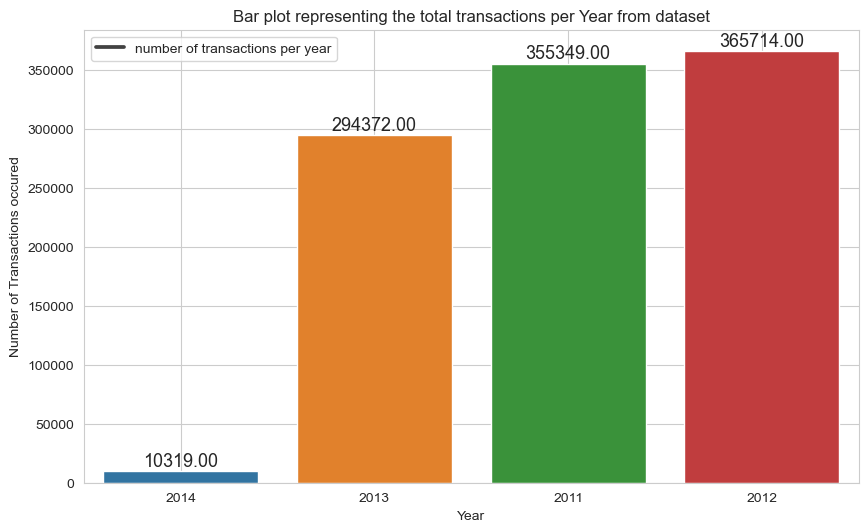

In [565]:
plt.figure(figsize=(10, 6))
plots = sns.barplot(x="year", y="number_of_txn_per_year", data=Year_txn,order=Year_txn.sort_values('number_of_txn_per_year').year)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 7),
                   textcoords='offset points')
    
# Creating the legend of the bars in the plot
plt.legend(labels = ['number of transactions per year'])
# Giving the tilte for the plot
plt.title("Bar plot representing the total transactions per Year from dataset")
# Namimg the x and y axis
plt.xlabel('Year')
plt.ylabel('Number of Transactions occured')
plt.grid(True)

### The Count of labels 

In [566]:
#minned minned label
parquet_df.select("label").distinct().show(truncate=False)

+---------------------------+
|label                      |
+---------------------------+
|paduaJigsaw                |
|montrealXLockerv5.0        |
|montrealJigSaw             |
|montrealCryptoTorLocker2015|
|montrealXTPLocker          |
|montrealAPT                |
|montrealRazy               |
|white                      |
|montrealNoobCrypt          |
|princetonCerber            |
|montrealEDA2               |
|paduaCryptoWall            |
|montrealGlobeImposter      |
|montrealCryptConsole       |
|montrealSamSam             |
|montrealSam                |
|montrealDMALockerv3        |
|montrealXLocker            |
|montrealVenusLocker        |
|montrealCryptoLocker       |
+---------------------------+
only showing top 20 rows



In [567]:
label_df = spark.sql("select label, count(label) as label_count from bc_data group by label order by 2 desc")

In [568]:
label_df=label_df.na.drop()

In [569]:
Newlabel_df=label_df.toPandas()

In [570]:
Newlabel_df=Newlabel_df.head(6)
Newlabel_df

,label,label_count
0,white,1007162
1,paduaCryptoWall,12390
2,montrealCryptoLocker,9315
3,princetonCerber,9223
4,princetonLocky,6625
5,montrealCryptXXX,2419


### White(1007162) which is not known to be ransomware

In [571]:
print(type(label_df))
print(type(Newlabel_df))
x=Newlabel_df['label']
y=Newlabel_df["label_count"]

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [572]:
Newlabel_df=Newlabel_df.drop([0])
x=Newlabel_df['label']
y=Newlabel_df["label_count"]
Newlabel_df

,label,label_count
1,paduaCryptoWall,12390
2,montrealCryptoLocker,9315
3,princetonCerber,9223
4,princetonLocky,6625
5,montrealCryptXXX,2419


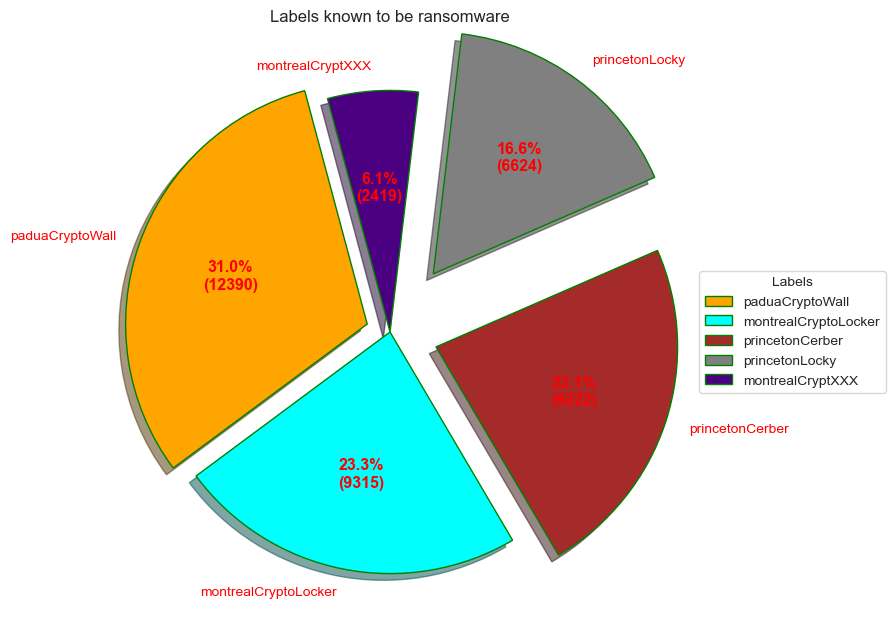

In [573]:
import numpy as np

l = Newlabel_df['label'] 
data = Newlabel_df["label_count"]
 
 
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    #print(absolute)
    #return pct
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 8))
wedges, texts, autotexts = ax.pie(y,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = x,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 105,
                                  wedgeprops = wp,
                                  textprops = dict(color ="red"))
 
# Adding legend
ax.legend(wedges, l,
          title ="Labels",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 11.5, weight ="bold")
ax.set_title("Labels known to be ransomware")
# show plot
plt.show()

In [574]:

#plt.pie(Newlabel_df['label'],labels = Newlabel_df['label_count'])   

In [575]:
income_year = spark.sql("SELECT income , year from bc_data where year = 2011 or year = 2013 order by income desc")


In [576]:
income_year.show()


+---------------+----+
|         income|year|
+---------------+----+
|499643.98238996|2011|
|498244.66601007|2011|
|497976.31116927|2011|
|497852.01883234|2011|
| 496785.7983011|2011|
|496766.69306791|2011|
|496651.52076174|2011|
|496324.31999242|2011|
|496150.15001557|2011|
|486752.21419529|2011|
|466023.66865338|2011|
|464548.09728703|2011|
|455501.30057744|2011|
|454856.92132679|2011|
|451523.24401692|2011|
|449111.17551607|2011|
|447785.59485753|2011|
|447427.86485753|2011|
|446573.52271277|2011|
|442561.65706485|2011|
+---------------+----+
only showing top 20 rows



In [577]:
income_year=income_year.toPandas()


In [578]:
income_year.dtypes

income    float64
year        int32
dtype: object

In [579]:
income_year.head(5)

,income,year
0,499643.982390,2011
1,498244.666010,2011
2,497976.311169,2011
3,497852.018832,2011
4,496785.798301,2011


In [580]:
income_year.astype(int)

,income,year
0,499643,2011
1,498244,2011
2,497976,2011
3,497852,2011
4,496785,2011
...,...,...
649716,0,2013
649717,0,2013
649718,0,2013
649719,0,2013


In [581]:
income_year=income_year[income_year.income != 0]

boxplot

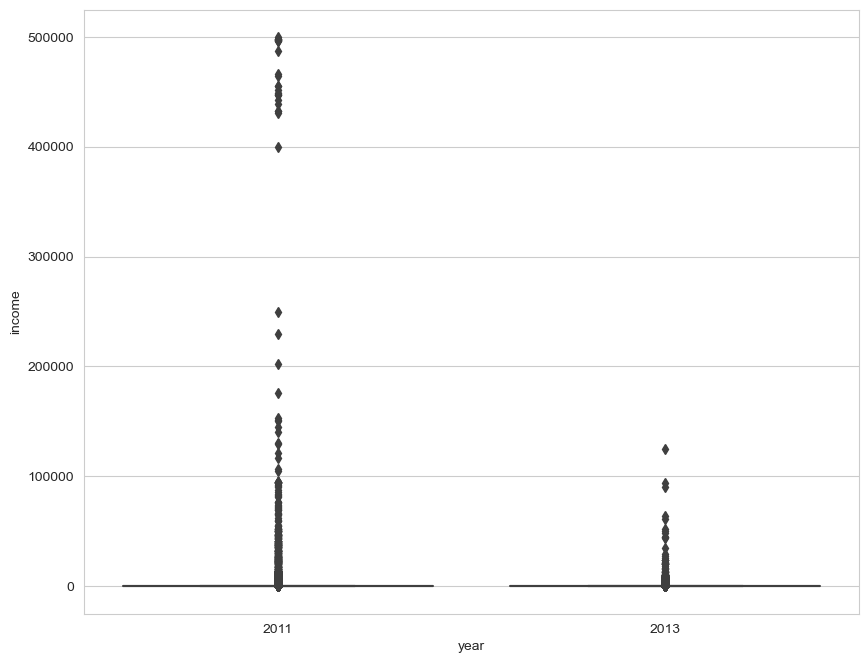

In [582]:
ax = sns.boxplot(x="year", y="income", data=income_year)

In [ ]:
ax = sns.swarmplot(x="year", y="income", data=income_year, color=".25")

In [583]:
orig_df1 = orig_df[orig_df.length != 0]


In [584]:
orig_df1.reset_index(drop=True, inplace=True)

In [585]:
orig_df1.to_csv("C:/Users/HP/Desktop/ECE552_final/ECE552_project/BitcoinHeistData2.csv")

In [586]:
house_df = spark.read.format("csv"). \
            option("header", "true").option("mode", "DROPMALFORMED").option("delimiter", ","). \
            option("ignoreLeadingWhiteSpace","true").option("ignoreTrailingWhiteSpace","true"). \
            option("inferschema","true"). \
            load('C:/Users/HP/Desktop/ECE552_final/ECE552_project/BitcoinHeistData1.csv')

In [587]:
house_df.take(1)

[Row(_c0=0, address='111K8kZAEnJg245r2cM6y9zgJGHZtJPy6', year=2017, day=11, length=18, weight=0.008333333, count=1, looped=0, neighbors=2, income=1.0005, label='princetonCerber')]

### descriptive anallysis

In [588]:

house_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
_c0,1048575,524287.0,302697.6735952888,0,1048574
address,1048575,None,None,1111111111111111111114oLvT2,3GbjoRZsMEaZoNEKQ9ByU7DFqYQzxwtn83
year,1048575,2012.0483856662613,1.005056531238343,2011,2018
day,1048575,173.52949383687385,100.14085576953202,1,365
length,1048575,26.317415540137805,42.720042828726775,0,144
weight,1048575,0.5406222223650033,2.9908459496285897,3.61E-94,498.2885258
count,1048575,158.20701237393607,602.4127303067922,1,13462
looped,1048575,36.08665283837589,288.47339538256995,0,11693
neighbors,1048575,2.3242200128746155,18.623586560640728,1,3776


In [589]:
import pandas as pd
from pandas.plotting import scatter_matrix

In [590]:
numeric_features = [t[0] for t in house_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = house_df.select(numeric_features).sample(False, 0.8).toPandas()


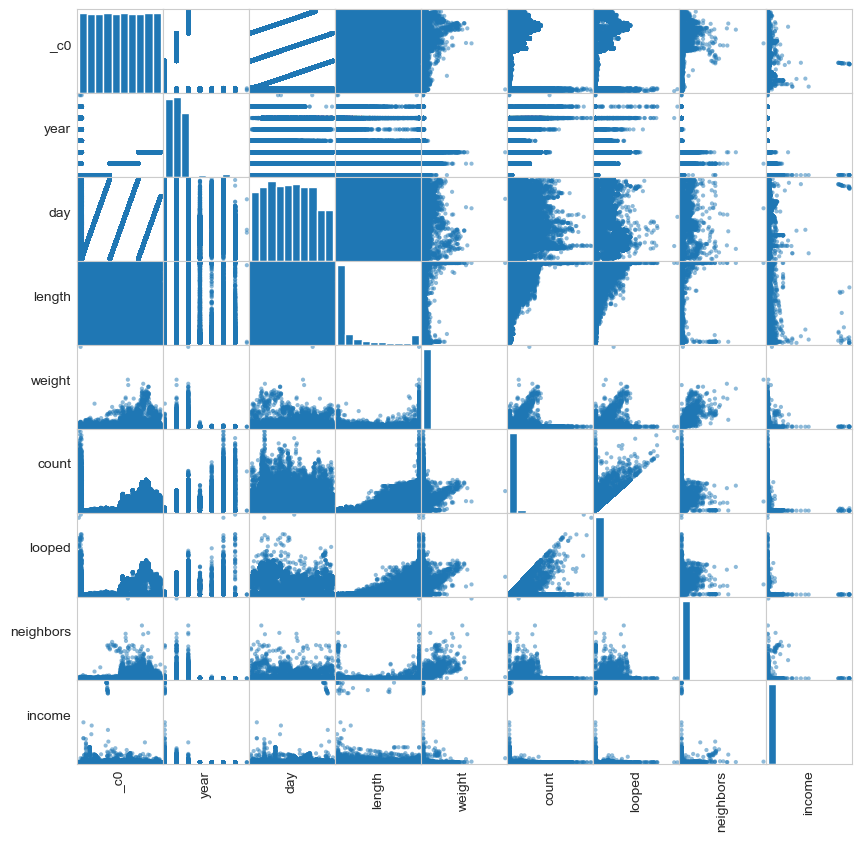

In [608]:

axs = scatter_matrix(sampled_data, figsize=(10, 10))
#ax.set_title("Scatter matrix for linear correlation between multiple independent variables")
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())
    

    
    


###  Machine learning models

### Linear regression model

In [592]:
from pyspark.ml.feature import VectorAssembler

In [593]:
house_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- length: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- count: integer (nullable = true)
 |-- looped: integer (nullable = true)
 |-- neighbors: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- label: string (nullable = true)



In [609]:
import six
for i in house_df.columns:
    if not( isinstance(house_df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Length for ", i, house_df.stat.corr('length',i))

Correlation to Length for  _c0 0.046628208681509936
Correlation to Length for  year 0.09177169340486724
Correlation to Length for  day 0.04342247835202402
Correlation to Length for  length 1.0
Correlation to Length for  weight 0.060180331529211345
Correlation to Length for  count 0.6627173924217697
Correlation to Length for  looped 0.32688044270582417
Correlation to Length for  neighbors 0.08099163536800867
Correlation to Length for  income 0.009641611840837548


In [595]:
vectorAssembler = VectorAssembler(inputCols = ['income', 'neighbors', 'looped', 'count', 'weight', 'length' ], outputCol = 'features')
vhouse_df = vectorAssembler.transform(house_df)
vhouse_df = vhouse_df.select(['features', 'length'])
vhouse_df.show(3)

+--------------------+------+
|            features|length|
+--------------------+------+
|[1.0005,2.0,0.0,1...|    18|
|[1.0,1.0,0.0,1.0,...|    44|
|[2.0,2.0,0.0,1.0,...|     0|
+--------------------+------+
only showing top 3 rows



### Train and Test split

In [596]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [597]:
test_df.show()

+--------------------+------+
|            features|length|
+--------------------+------+
|[0.3,1.0,0.0,1.0,...|   130|
|[0.3,1.0,0.0,1.0,...|   114|
|[0.3,1.0,0.0,1.0,...|   118|
|[0.3,1.0,0.0,1.0,...|    66|
|[0.3,1.0,0.0,1.0,...|    90|
|[0.3,1.0,0.0,1.0,...|    62|
|[0.3,1.0,0.0,1.0,...|    70|
|[0.3,1.0,0.0,1.0,...|   104|
|[0.3,1.0,0.0,1.0,...|    64|
|[0.3,1.0,0.0,1.0,...|    84|
|[0.3,1.0,0.0,1.0,...|   108|
|[0.3,1.0,0.0,1.0,...|    50|
|[0.3,1.0,0.0,1.0,...|    50|
|[0.3,1.0,0.0,1.0,...|    56|
|[0.3,1.0,0.0,1.0,...|    38|
|[0.3,1.0,0.0,1.0,...|    42|
|[0.3,1.0,0.0,1.0,...|    28|
|[0.3,1.0,0.0,1.0,...|    28|
|[0.3,1.0,0.0,1.0,...|    38|
|[0.3,1.0,0.0,1.0,...|    44|
+--------------------+------+
only showing top 20 rows



In [598]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='length', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.0,0.0,0.0,0.0,0.9933528371493169]
Intercept: 0.1747814056096046


In [599]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 0.283893
r2: 0.999956


In [600]:
train_df.describe().show()

+-------+-----------------+
|summary|           length|
+-------+-----------------+
|  count|           733966|
|   mean| 26.2941362406433|
| stddev|42.70898842474936|
|    min|                0|
|    max|              144|
+-------+-----------------+



In [601]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","length","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="length",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+------+--------------------+
|        prediction|length|            features|
+------------------+------+--------------------+
| 129.3106502350208|   130|[0.3,1.0,0.0,1.0,...|
|113.41700484063173|   114|[0.3,1.0,0.0,1.0,...|
|  117.390416189229|   118|[0.3,1.0,0.0,1.0,...|
| 65.73606865746453|    66|[0.3,1.0,0.0,1.0,...|
| 89.57653674904813|    90|[0.3,1.0,0.0,1.0,...|
+------------------+------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.999956


In [602]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 0.284139


In [603]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 11
objectiveHistory: [0.4999999999999999, 0.38122135545559316, 0.04948092617442175, 0.029621308549084034, 0.007708081762276442, 0.006428176910368608, 0.006297748096204369, 0.0062975373843313755, 0.006297411204998148, 0.006297335645781342, 0.006297290399106494]
+-------------------+
|          residuals|
+-------------------+
| 0.5431121822641671|
| 0.6760554392778317|
|0.46334622805596837|
| 0.3835802738477696|
|    0.5697008336669|
| 0.6095838107709994|
| 0.6627611135764653|
| 0.6760554392778317|
|0.46334622805596837|
|  0.423463250951869|
| 0.5165235308614342|
| 0.5298178565628007|
| 0.5032292051600677|
| 0.5431121822641671|
| 0.3171086453409373|
| 0.6095838107709994|
| 0.3569916224450367|
| 0.2506370168341121|
|0.33040297104230376|
| 0.5564065079655336|
+-------------------+
only showing top 20 rows



In [604]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","length","features").show()

+------------------+------+--------------------+
|        prediction|length|            features|
+------------------+------+--------------------+
| 129.3106502350208|   130|[0.3,1.0,0.0,1.0,...|
|113.41700484063173|   114|[0.3,1.0,0.0,1.0,...|
|  117.390416189229|   118|[0.3,1.0,0.0,1.0,...|
| 65.73606865746453|    66|[0.3,1.0,0.0,1.0,...|
| 89.57653674904813|    90|[0.3,1.0,0.0,1.0,...|
|61.762657308867254|    62|[0.3,1.0,0.0,1.0,...|
|  69.7094800060618|    70|[0.3,1.0,0.0,1.0,...|
|103.48347646913857|   104|[0.3,1.0,0.0,1.0,...|
| 63.74936298316589|    64|[0.3,1.0,0.0,1.0,...|
| 83.61641972615223|    84|[0.3,1.0,0.0,1.0,...|
|107.45688781773583|   108|[0.3,1.0,0.0,1.0,...|
| 49.84242326307545|    50|[0.3,1.0,0.0,1.0,...|
| 49.84242326307545|    50|[0.3,1.0,0.0,1.0,...|
|55.802540285971354|    56|[0.3,1.0,0.0,1.0,...|
| 37.92218921728365|    38|[0.3,1.0,0.0,1.0,...|
| 41.89560056588092|    42|[0.3,1.0,0.0,1.0,...|
|27.988660845790477|    28|[0.3,1.0,0.0,1.0,...|
|27.988660845790477|

In [605]:
test_df

DataFrame[features: vector, length: int]

In [606]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'length')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="length", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 2.39521
